In [1]:
import pandas as pd
%matplotlib inline

In [2]:
games = pd.read_csv('appstore_games.csv')

In [3]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [5]:
games.describe(exclude = 'number')

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/dayd-through-tim...,Network6,Emoji Stickers,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


In [6]:
games['Price'].sample(5)

4512     0.00
7000     0.99
10205    0.99
3448     0.00
3052     1.99
Name: Price, dtype: float64

In [7]:
games['Price'].drop_duplicates()

0          2.99
1          1.99
2          0.00
7          0.99
32         5.99
33         7.99
45         4.99
56         3.99
149        9.99
276       19.99
444        6.99
513       11.99
1322       8.99
2634     139.99
2937      12.99
4846      99.99
4886      14.99
7999      16.99
8177     179.99
8341        NaN
13730     37.99
14093     36.99
14281     29.99
14756     18.99
15031     59.99
Name: Price, dtype: float64

In [8]:
gamesDesc = []
for i in games.columns:
    gamesDesc.append([i, 
                      games[i].dtypes, 
                      games[i].isna().sum(), 
                      round((((games[i].isna().sum())/(len(games)))*100),2), 
                      games[i].nunique(),
                      games[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(gamesDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,URL,object,0,0.00,16847,[https://apps.apple.com/us/app/ace-de-in-winte...
1,ID,int64,0,0.00,16847,"[1035998417, 1013613882]"
2,Name,object,0,0.00,16847,"[FlipPix Art - Ages, Juicy Splash Mania]"
3,Subtitle,object,11746,69.07,5010,"[Search and Destroy, Engaging puzzle game]"
4,Icon URL,object,0,0.00,16847,[https://is4-ssl.mzstatic.com/image/thumb/Purp...
5,Average User Rating,float64,9446,55.54,9,"[1.5, 5.0]"
6,User Rating Count,float64,9446,55.54,1792,"[598.0, 461.0]"
7,Price,float64,24,0.14,24,"[2.99, 9.99]"
8,In-app Purchases,object,9324,54.82,3803,"[4.99, 9.99, 19.99, 4.99, 6.99, 8.99, 49.99, 1..."
9,Description,object,0,0.00,16473,[Fight evil creatures for justice! Help Hayley...


In [9]:
games['Age Rating'].unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

In [10]:
games['Primary Genre'].unique()

array(['Games', 'Entertainment', 'Finance', 'Sports', 'Reference',
       'Medical', 'Education', 'Utilities', 'Book', 'Travel',
       'Productivity', 'Lifestyle', 'Business', 'News',
       'Social Networking', 'Health & Fitness', 'Music', 'Stickers',
       'Food & Drink', 'Shopping', 'Navigation'], dtype=object)

In [11]:
games['Average User Rating'].value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: Average User Rating, dtype: int64

In [12]:
primary_mean = games.groupby('Primary Genre').mean()['Average User Rating']
primary_games = games.set_index('Primary Genre')
def fill_average(cols):
    if cols['Age Rating'] == '4+' and pd.isna(cols['Average User Rating']):
        return 5.0
    elif cols['Age Rating'] == '9+' and pd.isna(cols['Average User Rating']):
        return primary_mean[cols['Primary Genre']]
    elif cols['Age Rating'] == '12+' and pd.isna(cols['Average User Rating']):
        return primary_games.loc[cols['Primary Genre']].groupby('Age Rating').mean()['Average User Rating'][cols['Age Rating']]
    elif cols['Age Rating'] == '17+' and pd.isna(cols['Average User Rating']):
        return 5.0
    else:
        return cols['Average User Rating']
                 
     

In [13]:
primary_games.loc['Games'].groupby('Age Rating').mean()['Average User Rating']['12+']

4.123647604327666

In [14]:
games.groupby(['Age Rating', 'Primary Genre']).mean().loc['12+'].loc['Games']['Average User Rating']

4.123647604327666

In [15]:
games['Average User Rating'] = games[['Average User Rating', 'Primary Genre', 'Age Rating']].apply(fill_average, axis =1)  

In [16]:
games['Average User Rating'].value_counts()

5.000000    8705
4.500000    2868
4.000000    1727
4.065903     984
3.500000     925
4.123648     699
3.000000     515
2.500000     317
2.000000     158
1.500000      60
1.000000      14
3.831522      11
3.607143       8
4.152174       4
3.361111       3
4.750000       3
4.056818       3
4.300000       2
3.666667       1
Name: Average User Rating, dtype: int64

In [17]:
games = pd.read_csv('appstore_games.csv')

In [18]:
games['Average User Rating'].value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: Average User Rating, dtype: int64

## Latihan  Pandas

1. Apakah Jumlah kata (bukan panjang kata) yang ada di Feature Description secara umum mempengaruhi feature price dari App?
2. Berikan penjelasan yang bisa kalian lihat kenapa Feature Average User Rating, User Rating Count, dan In-app Purchases memiliki banyak Null Value? 
3. Apakah Feature Original Release Date dan Current Version Release Date mempengaruhi feature price?  

In [19]:
games = pd.read_csv('appstore_games.csv')

In [20]:
import re
games['Description'] = games['Description'].apply(lambda x: re.sub("[^a-zA-Z0-9]", " ", x))

In [21]:
games['Jumlah kata'] = games['Description'].apply(lambda x: len(x.split()))

In [22]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Jumlah kata
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,Join over 21 000 000 of our fans and download ...,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,292
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,The classic game of Reversi also known as Oth...,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,228
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,104
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,Top 100 free app for over a year nRated Best...,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,304
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,Senet Deluxe The Ancient Game of Life and A...,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,380


In [82]:
pd.set_option('display.max_rows', None)
games[['Jumlah kata', 'Price']].sort_values(by = 'Jumlah kata', ascending = False)

,Jumlah kata,Price
8821,2116,0.00
14128,2040,0.00
7332,1967,0.00
4872,1909,0.00
6253,1823,0.00
4099,1721,0.99
15075,1668,0.00
5667,1651,0.00
5257,1608,0.00
16501,1540,0.00


In [25]:
games['Price'].fillna(0, inplace = True)

In [26]:
games[['Jumlah kata', 'Price']].corr()

,Jumlah kata,Price
Jumlah kata,1.000000,0.066035
Price,0.066035,1.000000


In [27]:
games[['Jumlah kata', 'Price']].corr('spearman')

,Jumlah kata,Price
Jumlah kata,1.000000,0.105275
Price,0.105275,1.000000


<IPython.core.display.Javascript object>

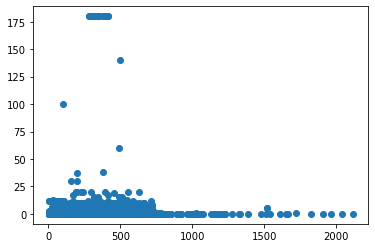

In [28]:
plt.scatter(games['Jumlah kata'], games['Price'])

In [29]:
games['Jumlah kata'].describe()

count    17007.000000
mean       183.275945
std        156.420315
min          1.000000
25%         72.000000
50%        140.000000
75%        247.000000
max       2116.000000
Name: Jumlah kata, dtype: float64

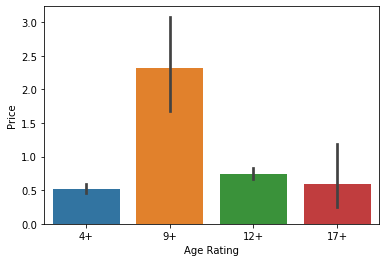

In [106]:
import seaborn as sns
sns.barplot(data = games, x = 'Age Rating', y= 'Price')

C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

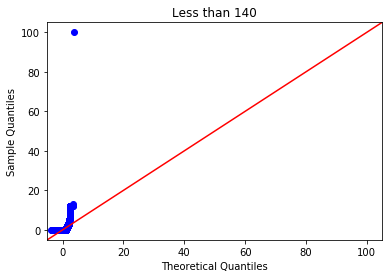

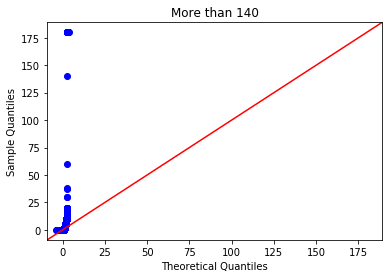

In [30]:
import statsmodels.api as sm
import pylab

sm.qqplot(games[games['Jumlah kata'] <= 140]['Price'], line = '45')
plt.title('Less than 140')

sm.qqplot(games[games['Jumlah kata'] > 140]['Price'], line = '45')
plt.title('More than 140')
pylab.show()

In [31]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [32]:
try_normal(games[games['Jumlah kata'] <= 140]['Price'])

C:\Users\MSI\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.091,
  'stat': 2366.8906720921004},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [33]:
try_normal(games[games['Jumlah kata'] > 140]['Price'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.091,
  'stat': 2711.5526174274873},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [35]:
from scipy.stats import mannwhitneyu
mannwhitneyu(games[games['Jumlah kata'] <= 140]['Price'], games[games['Jumlah kata'] > 140]['Price'])

MannwhitneyuResult(statistic=33777455.0, pvalue=3.7671034716828477e-31)

In [90]:
import numpy as np
games[games['Jumlah kata'] <= 140]['Price'].mean()

0.3404176904176826

Here I done a little clean up by only keeping the letter and the number from the description feature, and acquire the total word by splitting them up. I use the corellation method to see if they correlated or not. It seems that the total word and the price did not affecting each other (In linear sense).

If I try to group it into 2 different category, less than 140 and more than 14 words. It seems there is a statistically differences between the price.

In [36]:
games[games['User Rating Count'].isna()]['Average User Rating'].unique()

array([nan])

In [37]:
games['User Rating Count'].describe()

count    7.561000e+03
mean     3.306531e+03
std      4.232256e+04
min      5.000000e+00
25%      1.200000e+01
50%      4.600000e+01
75%      3.090000e+02
max      3.032734e+06
Name: User Rating Count, dtype: float64

In [38]:
games[games['Average User Rating'].isna()]['User Rating Count'].unique()

array([nan])

In [39]:
games['Average User Rating'].describe()

count    7561.000000
mean        4.060905
std         0.751428
min         1.000000
25%         3.500000
50%         4.500000
75%         4.500000
max         5.000000
Name: Average User Rating, dtype: float64

In [40]:
games[games['User Rating Count'].isna()]['In-app Purchases'].unique()

array([nan, '0.99', '1.99', ..., '0.99, 5.99, 12.99, 1.99, 79.99, 26.99',
       '1.99, 9.99, 4.99, 2.99, 0.99', '9.99, 49.99, 3.99'], dtype=object)

In [41]:
games[games['In-app Purchases'].isna()]['User Rating Count'].unique()

array([3.55300e+03, 2.84000e+02, 8.37600e+03, 1.90394e+05, 2.80000e+01,
       3.50000e+01, 1.25000e+02, 4.40000e+01, 1.84000e+02,         nan,
       5.07200e+03, 5.26000e+02, 9.89000e+02, 2.35800e+03, 5.04000e+02,
       7.00000e+00, 3.00000e+01, 6.37000e+02, 1.56300e+03, 7.24280e+04,
       1.90000e+02, 6.90000e+01, 5.23000e+02, 1.56000e+02, 3.06200e+03,
       2.42500e+03, 5.18000e+02, 5.48800e+03, 3.52100e+03, 6.70000e+01,
       5.93100e+03, 2.79800e+03, 1.60000e+01, 4.83000e+02, 7.50000e+01,
       5.62900e+03, 2.48200e+03, 7.70000e+01, 1.46100e+03, 1.74100e+03,
       6.00000e+00, 7.40000e+02, 8.90000e+01, 4.13000e+02, 9.12100e+03,
       1.70450e+04, 4.22100e+04, 1.15600e+03, 2.02340e+04, 3.59000e+02,
       8.40000e+01, 1.30000e+01, 2.70000e+01, 2.94950e+04, 1.90000e+01,
       3.51990e+04, 5.01300e+03, 1.11900e+03, 2.60600e+03, 8.63000e+02,
       1.92600e+03, 1.84800e+03, 2.48210e+04, 2.50300e+03, 1.66930e+04,
       1.91081e+05, 2.76700e+03, 1.26590e+04, 4.00000e+01, 3.530

In [42]:
games[games['Average User Rating'].isna()]['In-app Purchases'].unique()

array([nan, '0.99', '1.99', ..., '0.99, 5.99, 12.99, 1.99, 79.99, 26.99',
       '1.99, 9.99, 4.99, 2.99, 0.99', '9.99, 49.99, 3.99'], dtype=object)

It seems that if User Rating Count is null, then Average user rating is also null and vice versa. In-app purchases null Value seems not affected by the null value of the other features. 
What is interesting is that the number of the user rating count have a minimum 5, means that there are no user rating count that is lower than 5. Also, if the user rating count and average user rating are affecting each other then it is mean that average user rating would only present when there are more than 5 user that rate the app.  

Lets see if the Null value of these feature are affected by the other features. I would not done a really deep analysis to every feature that exist, especially the text one as it would took much time. I would only analyze few features that I already feel affecting the Null values in the features

In [43]:
games['Original Release Date'] = pd.to_datetime(games['Original Release Date'])
games['Current Version Release Date'] = pd.to_datetime(games['Current Version Release Date'])
user_na = games[games['User Rating Count'].isna()].copy()

In [44]:
user_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9446 entries, 10 to 17006
Data columns (total 19 columns):
URL                             9446 non-null object
ID                              9446 non-null int64
Name                            9446 non-null object
Subtitle                        2537 non-null object
Icon URL                        9446 non-null object
Average User Rating             0 non-null float64
User Rating Count               0 non-null float64
Price                           9446 non-null float64
In-app Purchases                3049 non-null object
Description                     9446 non-null object
Developer                       9446 non-null object
Age Rating                      9446 non-null object
Languages                       9410 non-null object
Size                            9445 non-null float64
Primary Genre                   9446 non-null object
Genres                          9446 non-null object
Original Release Date           9446 non-null 

In [45]:
print('Original Data')
print(games['Age Rating'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['Age Rating'].value_counts())

Original Data
4+     11806
9+      2481
12+     2055
17+      665
Name: Age Rating, dtype: int64

User Rating Null Data
4+     7339
9+     1009
12+     722
17+     376
Name: Age Rating, dtype: int64


In [46]:
print('Original Data')
print(games['Price'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['Price'].value_counts())

Original Data
0.00      14236
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
59.99         1
139.99        1
37.99         1
18.99         1
Name: Price, dtype: int64

User Rating Null Data
0.00      7911
0.99       726
1.99       314
2.99       219
3.99        58
11.99       56
4.99        52
9.99        40
179.99      30
5.99        14
7.99         7
6.99         6
19.99        4
14.99        2
29.99        2
18.99        1
16.99        1
99.99        1
37.99        1
8.99         1
Name: Price, dtype: int64


In [47]:
print('Original Data')
print(games['Primary Genre'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['Primary Genre'].value_counts())

Original Data
Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Music                    3
Navigation               3
Medical                  2
Travel                   1
Shopping                 1
Name: Primary Genre, dtype: int64

User Rating Null Data
Games                8995
Education             176
Entertainment         106
Sports                 37
Utilities              33
Stickers               26
Reference              14
Business               14
Finance                10
Productivity            7
Social Networking       6
Lifestyle               6
News                    5
Book                    

In [48]:
print('Original Data')
print(games['Developer'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['Developer'].value_counts())

Original Data
Tapps Tecnologia da Informa\xe7\xe3o Ltda.           123
Vikash Patel                                         107
Netsummit Marketing, Inc.                             95
GabySoft                                              85
NetSummit Enterprises, Inc.                           77
                                                    ... 
PLAYTINUM SOFTWARE AND MULTIMEDIA PRIVATE LIMITED      1
Usman Sheikh                                           1
Shahar Melamed                                         1
MeganetSoft                                            1
BO LIU                                                 1
Name: Developer, Length: 8693, dtype: int64

User Rating Null Data
Vikash Patel                   106
Netsummit Marketing, Inc.       77
GabySoft                        70
NetSummit Enterprises, Inc.     60
Domyung Kim                     57
                              ... 
Will Stankus                     1
Patcharaporn Tante               1
Joshua Young

In [49]:
print('Original Data')
print(games['Original Release Date'].apply(lambda x: x.year).value_counts())
print('')
print('User Rating Null Data')
print(user_na['Original Release Date'].apply(lambda x: x.year).value_counts())

Original Data
2016    3126
2017    2818
2018    2504
2015    2216
2014    1893
2019    1570
2013    1161
2012     729
2011     490
2010     277
2009     176
2008      47
Name: Original Release Date, dtype: int64

User Rating Null Data
2016    2079
2017    1854
2018    1600
2015    1318
2019    1093
2014     938
2013     326
2012     131
2011      78
2010      22
2009       4
2008       3
Name: Original Release Date, dtype: int64


In [50]:
print('Original Data')
print(games['Current Version Release Date'].apply(lambda x: x.year).value_counts())
print('')
print('User Rating Null Data')
print(user_na['Current Version Release Date'].apply(lambda x: x.year).value_counts())

Original Data
2019    3789
2017    3486
2018    3207
2016    2881
2015    1626
2014    1100
2013     515
2012     224
2011     108
2010      48
2009      17
2008       6
Name: Current Version Release Date, dtype: int64

User Rating Null Data
2017    2192
2016    1928
2018    1855
2019    1715
2015     986
2014     584
2013     147
2012      24
2011      12
2010       2
2008       1
Name: Current Version Release Date, dtype: int64


In [51]:
games['Day Difference'] = games[['Original Release Date', 
                            'Current Version Release Date']].apply(lambda x: (x['Current Version Release Date'] - x['Original Release Date']).days, 
                                                                   axis =1)
user_na['Day Difference'] = user_na[['Original Release Date', 
                            'Current Version Release Date']].apply(lambda x: (x['Current Version Release Date'] - x['Original Release Date']).days, 
                                                                   axis =1)


In [52]:
games[games['Day Difference'] <0]

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Jumlah kata,Day Difference
10,https://apps.apple.com/us/app/quaddraxx/id2875...,287563734,Quaddraxx,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,Quaddraxx Logic u2013 Challenge your brain n...,H2F Informationssysteme GmbH,4+,EN,3089867.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-11-08,2008-09-30,127,-39
63,https://apps.apple.com/us/app/pocketsports-foo...,303830590,PocketSports Football Lite,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,2.5,20234.0,0.0,NaN,Finally iPhone and iPod touch gets it s first...,Solus Games,12+,EN,4528173.0,Games,"Games, Sports, Entertainment, Strategy",2009-12-02,2009-02-19,376,-286
96,https://apps.apple.com/us/app/nerve/id313324870,313324870,Nerve,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,2.5,47.0,0.0,NaN,Nerve is a game of chance and strategy Are yo...,Mahboud Zabetian,4+,EN,6994639.0,Games,"Games, Strategy",2009-04-28,2009-03-07,34,-52
181,https://apps.apple.com/us/app/solve-sudoku-fre...,335049342,Solve Sudoku FREE,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,234.0,0.0,NaN,Now you can solve the toughest sudoku puzzles...,Procypher Software Co.,4+,EN,1098368.0,Games,"Games, Puzzle, Strategy",2009-05-11,2009-04-12,103,-29
359,https://apps.apple.com/us/app/conquist-lite/id...,381004911,Conquist Lite,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,861.0,0.0,NaN,Conquist Lite transforms your IPad into the ul...,Schmeuk Studios,4+,"EN, FR, DE, IT, ES",5682435.0,Games,"Games, Strategy, Board, Entertainment",2010-07-24,2010-04-08,218,-107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16752,https://apps.apple.com/us/app/number-dots/id14...,1467863134,Number Dots !,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,Start a line with two identical numbers n ...,SightUp,4+,EN,31771648.0,Games,"Games, Strategy, Puzzle",2019-06-14,2019-03-08,101,-98
16820,https://apps.apple.com/us/app/dungeons-skeleto...,1469886818,Dungeons & Skeletons,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,Dungeons and Skeletons is a new tower defense ...,Ubeydullah Yuruk,4+,EN,247868416.0,Games,"Games, Strategy, Action",2019-06-29,2019-01-08,346,-172
16822,https://apps.apple.com/us/app/idle-plane-game-...,1469907238,Idle Plane Game Airport Tycoon,Build a dream airport.,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,NAME,Lilit Harutyunyan,4+,EN,85040128.0,Games,"Games, Strategy",2019-06-29,2019-03-08,1,-113
16848,https://apps.apple.com/us/app/idle-pet-hospita...,1470612876,Idle Pet Hospital Tycoon,Build a pet vet hospital!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,2.99,Build your own pet vet clinic n nWelcome to ...,Alekseq Ogorodnikov,4+,EN,189921280.0,Games,"Games, Strategy, Simulation",2019-06-30,2019-02-07,178,-143


In [53]:
print('Original Data')
print(games['Day Difference'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['Day Difference'].value_counts())

Original Data
0       6240
1         57
3         52
61        45
31        45
        ... 
2011       1
2027       1
2077       1
2084       1
4086       1
Name: Day Difference, Length: 2690, dtype: int64

User Rating Null Data
 0       5030
 1         41
 3         30
 4         29
 31        29
         ... 
-100        1
-68         1
 2085       1
 2061       1
 1651       1
Name: Day Difference, Length: 1584, dtype: int64


What is interesting is that the amount of the app that does not have rated by the user are around half of the game that exist on the app, and it is happen in nearly all the games primary genre, or age, or price. Its also means that those feature probably did not affect the data that were null. 

I am try to create a difference between the original release and the current version of the game. It seems that most of the game that did not have any user count is because that the games are not updated (it come to why it was not updated, maybe its just like a game from a developer that were not known so it was like a test game, or it just not selling well)

Now lets see if the In-app purchases null value is affected by any other features

In [54]:
in_app_na = games[games['In-app Purchases'].isna()]

In [55]:
in_app_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9324 entries, 0 to 17006
Data columns (total 20 columns):
URL                             9324 non-null object
ID                              9324 non-null int64
Name                            9324 non-null object
Subtitle                        2473 non-null object
Icon URL                        9324 non-null object
Average User Rating             2927 non-null float64
User Rating Count               2927 non-null float64
Price                           9324 non-null float64
In-app Purchases                0 non-null object
Description                     9324 non-null object
Developer                       9324 non-null object
Age Rating                      9324 non-null object
Languages                       9291 non-null object
Size                            9324 non-null float64
Primary Genre                   9324 non-null object
Genres                          9324 non-null object
Original Release Date           9324 non-nul

In [56]:
in_app_na['User Rating Count'].isna().sum()

6397

In [57]:
in_app_na['Average User Rating'].isna().sum()

6397

In [58]:
in_app_na['Average User Rating'].value_counts()

4.5    810
4.0    665
3.5    443
5.0    421
3.0    269
2.5    182
2.0     89
1.5     36
1.0     12
Name: Average User Rating, dtype: int64

In [59]:
print('Original Data')
print(games['Day Difference'].value_counts())
print('')
print('In-App Purchase Null Data')
print(in_app_na['Day Difference'].value_counts())

Original Data
0       6240
1         57
3         52
61        45
31        45
        ... 
2011       1
2027       1
2077       1
2084       1
4086       1
Name: Day Difference, Length: 2690, dtype: int64

In-App Purchase Null Data
0       4217
1         37
3         31
2         27
8         26
        ... 
1245       1
1261       1
3347       1
1277       1
1971       1
Name: Day Difference, Length: 2043, dtype: int64


In [60]:
print('Original Data')
print(games['Primary Genre'].value_counts())
print('')
print('In-App Purchase Null Data')
print(in_app_na['Primary Genre'].value_counts())

Original Data
Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Music                    3
Navigation               3
Medical                  2
Travel                   1
Shopping                 1
Name: Primary Genre, dtype: int64

In-App Purchase Null Data
Games                8803
Education             198
Entertainment         134
Utilities              52
Sports                 43
Stickers               29
Reference              13
Lifestyle               8
Business                7
Finance                 7
Social Networking       6
News                    6
Productivity            5
Food & Drink        

In [61]:
print('Original Data')
print(games['Age Rating'].value_counts())
print('')
print('In-App Purchase Null Data')
print(in_app_na['Age Rating'].value_counts())

Original Data
4+     11806
9+      2481
12+     2055
17+      665
Name: Age Rating, dtype: int64

In-App Purchase Null Data
4+     7063
9+     1021
12+     812
17+     428
Name: Age Rating, dtype: int64


In [62]:
print('Original Data')
print(games['Price'].value_counts())
print('')
print('In-App Purchase Null Data')
print(in_app_na['Price'].value_counts())

Original Data
0.00      14236
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
59.99         1
139.99        1
37.99         1
18.99         1
Name: Price, dtype: int64

In-App Purchase Null Data
0.00      7134
0.99       887
1.99       412
2.99       362
4.99       171
3.99       133
9.99        77
5.99        32
179.99      30
6.99        27
11.99       17
7.99        15
8.99        10
19.99        5
14.99        3
16.99        2
29.99        2
59.99        1
36.99        1
99.99        1
12.99        1
37.99        1
Name: Price, dtype: int64


In [63]:
print('Original Data')
print(games['Developer'].value_counts())
print('')
print('In-App Purchase Null Data')
print(in_app_na['Developer'].value_counts())

Original Data
Tapps Tecnologia da Informa\xe7\xe3o Ltda.           123
Vikash Patel                                         107
Netsummit Marketing, Inc.                             95
GabySoft                                              85
NetSummit Enterprises, Inc.                           77
                                                    ... 
PLAYTINUM SOFTWARE AND MULTIMEDIA PRIVATE LIMITED      1
Usman Sheikh                                           1
Shahar Melamed                                         1
MeganetSoft                                            1
BO LIU                                                 1
Name: Developer, Length: 8693, dtype: int64

In-App Purchase Null Data
Vikash Patel      107
GabySoft           84
Andrew Kudrin      62
MmpApps Corp.      54
Anthony Hindle     37
                 ... 
Yariv Gdidi         1
osnine              1
Michael Kiefte      1
Sincereal           1
BO LIU              1
Name: Developer, Length: 5254, dtype: int64


In [100]:
sum(games[games['Price'] > 0]['In-app Purchases'].value_counts())

581

In [104]:
mannwhitneyu(games[(~games['In-app Purchases'].isna()) & (games['Price'] > 0)]['Price'], 
             games[(games['In-app Purchases'].isna()) & (games['Price'] > 0)]['Price']) 

MannwhitneyuResult(statistic=565894.0, pvalue=1.0473176893453186e-05)

In [101]:
sum(games[games['Price'] == 0]['In-app Purchases'].value_counts())

7102

From what I see from exploring the data, it seems many of the app that does not have any In-app purchases are games that also did not updated at all or not much updated. Seems right now we could see a correlation between the null value in the both user rating count and average user rating feature, but of course I assume that In-app purchases null value have another reason to be null. 

I assume that the pricier the app, the higher the chance that the app would have no In-app purchases. Also, some developer that develop many games also have some games that does not include any In-app purchases; this mean, developer play big part to decide if their games include In-app purchases or not.

In [64]:
games['Original Year'] = games['Original Release Date'].apply(lambda x: x.year)
games['Current Version Year'] = games['Current Version Release Date'].apply(lambda x: x.year)

games['Original Month'] = games['Original Release Date'].apply(lambda x: x.month)
games['Current Version Month'] = games['Current Version Release Date'].apply(lambda x: x.month)

games['Original Day'] = games['Original Release Date'].apply(lambda x: x.day)
games['Current Version Day'] = games['Current Version Release Date'].apply(lambda x: x.day)

games['Original Day Name'] = games['Original Release Date'].apply(lambda x: x.day_name())
games['Current Version Day Name'] = games['Current Version Release Date'].apply(lambda x: x.day_name())

In [65]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Jumlah kata,Day Difference,Original Year,Current Version Year,Original Month,Current Version Month,Original Day,Current Version Day,Original Day Name,Current Version Day Name
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,Join over 21 000 000 of our fans and download ...,...,292,3126,2008,2017,11,5,7,30,Friday,Tuesday
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,The classic game of Reversi also known as Oth...,...,228,3478,2008,2018,11,5,7,17,Friday,Thursday
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello also k...,...,104,3105,2008,2017,11,5,7,9,Friday,Tuesday
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,Top 100 free app for over a year nRated Best...,...,304,3233,2008,2017,7,5,23,30,Wednesday,Tuesday
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,Senet Deluxe The Ancient Game of Life and A...,...,380,3656,2008,2018,7,7,18,22,Friday,Sunday


In [66]:
games[['Price','Original Year', 'Original Month', 'Original Day', 'Original Day Name', 'Current Version Year',
      'Current Version Month', 'Current Version Day', 'Current Version Day Name', 'Day Difference']].corr()

,Price,Original Year,Original Month,Original Day,Current Version Year,Current Version Month,Current Version Day,Day Difference
Price,1.000000,-0.006852,-0.013440,-0.009379,0.004227,-0.014196,-0.017223,0.012335
Original Year,-0.006852,1.000000,-0.122095,-0.007537,0.603911,-0.089628,0.005079,-0.623205
Original Month,-0.013440,-0.122095,1.000000,-0.003984,-0.064208,0.388862,0.019588,-0.006858
Original Day,-0.009379,-0.007537,-0.003984,1.000000,0.004632,0.008995,0.381790,0.007980
Current Version Year,0.004227,0.603911,-0.064208,0.004632,1.000000,-0.142872,0.004659,0.233034
Current Version Month,-0.014196,-0.089628,0.388862,0.008995,-0.142872,1.000000,-0.004780,0.058622
Current Version Day,-0.017223,0.005079,0.019588,0.381790,0.004659,-0.004780,1.000000,0.002677
Day Difference,0.012335,-0.623205,-0.006858,0.007980,0.233034,0.058622,0.002677,1.000000


In [67]:
games[['Price','Original Year', 'Original Month', 'Original Day', 'Original Day Name', 'Current Version Year',
      'Current Version Month', 'Current Version Day', 'Current Version Day Name', 'Day Difference']].corr('spearman')

,Price,Original Year,Original Month,Original Day,Current Version Year,Current Version Month,Current Version Day,Day Difference
Price,1.000000,-0.095777,-0.012590,-0.003632,0.039289,-0.001563,0.000398,0.148916
Original Year,-0.095777,1.000000,-0.124785,-0.003478,0.629266,-0.096002,0.004411,-0.447115
Original Month,-0.012590,-0.124785,1.000000,-0.002420,-0.070051,0.388776,0.020294,-0.048765
Original Day,-0.003632,-0.003478,-0.002420,1.000000,0.008868,0.009497,0.381472,0.045774
Current Version Year,0.039289,0.629266,-0.070051,0.008868,1.000000,-0.156969,0.007057,0.243386
Current Version Month,-0.001563,-0.096002,0.388776,0.009497,-0.156969,1.000000,-0.003262,0.094102
Current Version Day,0.000398,0.004411,0.020294,0.381472,0.007057,-0.003262,1.000000,0.031040
Day Difference,0.148916,-0.447115,-0.048765,0.045774,0.243386,0.094102,0.031040,1.000000


In [68]:
games.groupby('Original Year').mean()['Price']

Original Year
2008    1.420000
2009    0.927670
2010    1.111336
2011    0.798796
2012    0.614897
2013    0.633850
2014    0.446693
2015    0.363312
2016    2.192710
2017    0.596718
2018    0.356298
2019    0.396210
Name: Price, dtype: float64

In [69]:
games.groupby('Original Month').mean()['Price']

Original Month
1     0.831023
2     0.727216
3     1.046107
4     1.362893
5     0.682851
6     0.738675
7     0.910338
8     0.403122
9     1.099730
10    0.785813
11    0.456896
12    0.616952
Name: Price, dtype: float64

In [70]:
games.groupby('Original Day').mean()['Price']

Original Day
1     0.313269
2     0.405366
3     0.370291
4     0.552764
5     0.367509
6     1.685630
7     1.849205
8     0.821473
9     1.733283
10    0.525069
11    0.928616
12    0.470590
13    0.937170
14    1.770307
15    0.827641
16    0.733676
17    0.891705
18    0.876321
19    0.420372
20    1.453480
21    0.443590
22    0.831033
23    1.188121
24    0.959533
25    0.447079
26    0.379027
27    0.516482
28    0.426390
29    0.331171
30    0.683273
31    0.559971
Name: Price, dtype: float64

In [71]:
games.groupby('Original Day Name').mean()['Price']

Original Day Name
Friday       0.899905
Monday       0.664811
Saturday     0.833363
Sunday       0.737790
Thursday     1.089143
Tuesday      0.728153
Wednesday    0.657134
Name: Price, dtype: float64

In [72]:
games.groupby('Current Version Year').mean()['Price']

Current Version Year
2008    0.000000
2009    0.058235
2010    0.124375
2011    0.184537
2012    0.173080
2013    0.125825
2014    0.208545
2015    0.324865
2016    1.544235
2017    1.401127
2018    0.549448
2019    0.483201
Name: Price, dtype: float64

In [73]:
games.groupby('Current Version Month').mean()['Price']

Current Version Month
1     0.605028
2     0.909732
3     1.926964
4     0.651675
5     0.898325
6     0.731106
7     0.708912
8     0.417490
9     0.611011
10    0.542856
11    0.713092
12    0.979813
Name: Price, dtype: float64

In [74]:
games.groupby('Current Version Day').mean()['Price']

Current Version Day
1     0.452710
2     0.419012
3     0.352956
4     2.553272
5     0.731776
6     1.328827
7     0.628844
8     0.826114
9     0.872565
10    0.491588
11    0.755770
12    1.507985
13    0.570663
14    0.808595
15    2.129104
16    0.394943
17    0.742526
18    0.755894
19    1.463697
20    1.025430
21    0.453173
22    0.430689
23    0.481069
24    0.863567
25    0.434477
26    0.459300
27    0.545397
28    0.682124
29    0.401791
30    0.827024
31    0.404513
Name: Price, dtype: float64

In [75]:
games.groupby('Current Version Day Name').mean()['Price']

Current Version Day Name
Friday       0.707209
Monday       0.811245
Saturday     0.843843
Sunday       0.763450
Thursday     0.826714
Tuesday      0.868137
Wednesday    0.853697
Name: Price, dtype: float64

It seems Original Release date and the Current Version did not affecting the price. 